<a href="https://colab.research.google.com/github/prajwal-ky22/Data-Science-Algorithms/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd
import csv

In [91]:
train = pd.read_csv('https://raw.githubusercontent.com/prajwal-ky22/Data-Science-Algorithms/main/Mini%20Hackathon/train_ctrUa4K.csv')

In [92]:
test = pd.read_csv('https://raw.githubusercontent.com/prajwal-ky22/Data-Science-Algorithms/main/Mini%20Hackathon/test_lAUu6dG.csv')

In [93]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [94]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [95]:
train.shape

(614, 13)

In [96]:
test.shape

(367, 12)

In [97]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


In [98]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [99]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [100]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [101]:
train.groupby(['Gender','Loan_Status'])['Loan_Status'].count()

Gender  Loan_Status
Female  N               37
        Y               75
Male    N              150
        Y              339
Name: Loan_Status, dtype: int64

In [102]:
train.groupby(['Property_Area','Loan_Status'])['Loan_Status'].count()

Property_Area  Loan_Status
Rural          N               69
               Y              110
Semiurban      N               54
               Y              179
Urban          N               69
               Y              133
Name: Loan_Status, dtype: int64

In [103]:
train.groupby(['Property_Area','Loan_Status'])['Loan_Status'].count()

Property_Area  Loan_Status
Rural          N               69
               Y              110
Semiurban      N               54
               Y              179
Urban          N               69
               Y              133
Name: Loan_Status, dtype: int64

In [104]:
train.groupby(['Education','Loan_Status'])['Loan_Status'].count()


Education     Loan_Status
Graduate      N              140
              Y              340
Not Graduate  N               52
              Y               82
Name: Loan_Status, dtype: int64

In [105]:
test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [106]:
import seaborn as sns               # for data viz.
import matplotlib.pyplot as plt     # for plotting graphs
%matplotlib inline

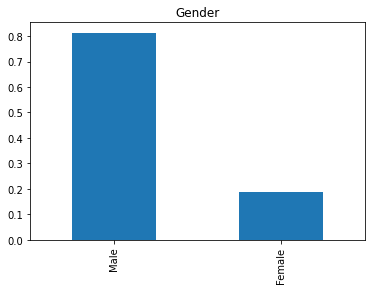

In [107]:
train['Gender'].value_counts(normalize=True).plot.bar(title = 'Gender') 

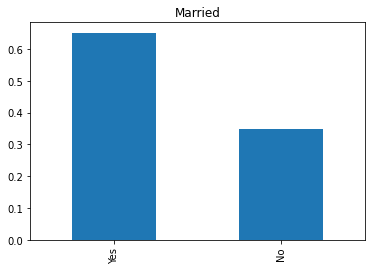

In [108]:
train['Married'].value_counts(normalize=True).plot.bar(title = 'Married') 

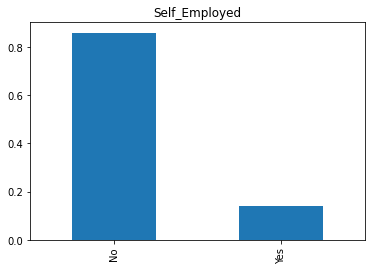

In [109]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title = 'Self_Employed') 

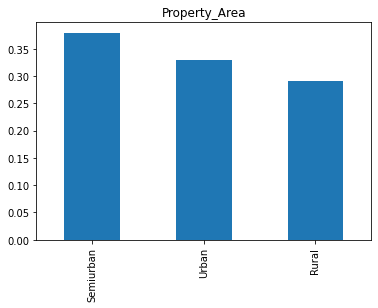

In [110]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title = 'Property_Area') 

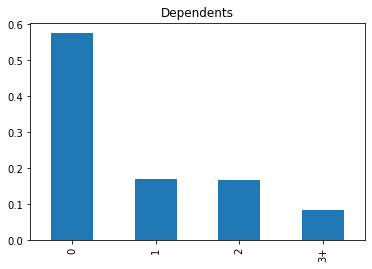

In [111]:
train['Dependents'].value_counts(normalize=True).plot.bar(title = 'Dependents') 

In [112]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [113]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [114]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

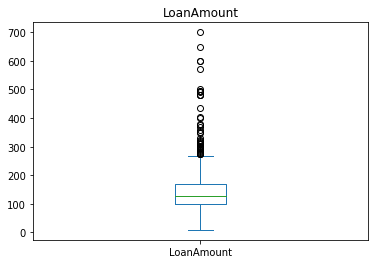

In [115]:
train['LoanAmount'].plot.box(title = 'LoanAmount') 

In [116]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [117]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [118]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [119]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,614,2,Male,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,614,2,Yes,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,614,4,0,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,614,2,No,532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,NaN,NaN,NaN,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,NaN,NaN,NaN,342.410423,64.428629,12.0,360.0,360.0,360.0,480.0


In [120]:
train['Gender'].replace('Male',1,inplace=True)
train['Gender'].replace('Female',0,inplace=True)

In [121]:
train['Married'].replace('Yes',1,inplace=True)
train['Married'].replace('No',0,inplace=True)

In [122]:
train['Education'].replace('Graduate',1,inplace=True)
train['Education'].replace('Not Graduate',0,inplace=True)

In [123]:
train['Self_Employed'].replace('Yes',1,inplace=True)
train['Self_Employed'].replace('No',0,inplace=True)

In [124]:
train['Property_Area'].replace('Rural',0,inplace=True)
train['Property_Area'].replace('Semiurban',1,inplace=True)
train['Property_Area'].replace('Urban',2,inplace=True)

In [125]:
train['Dependents'].replace('3+',3,inplace=True)

In [126]:
train.drop('Loan_ID',1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [127]:
train.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,Y
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,Y
6,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,Y
7,1,1,3,1,0,3036,2504.0,158.0,360.0,0.0,1,N
8,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,Y
9,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,N


In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [129]:
x = train.iloc[:,:-1]

In [130]:
x.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2


In [131]:
y = train.iloc[:,-1]

In [132]:
y.head(5)

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [133]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=11)

In [134]:
x_train.shape

(429, 11)

In [135]:
y_train.shape

(429,)

In [136]:
x_test.shape

(185, 11)

In [137]:
y_test.shape

(185,)

In [138]:
model = GaussianNB()

In [139]:
x_train.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
348,1,1,0,1,0,6333,4583.000000,259.0,360.0,1.0,1
67,1,1,1,1,0,10750,0.000000,312.0,360.0,1.0,2
525,1,1,2,1,1,17500,0.000000,400.0,360.0,1.0,0
454,1,0,0,1,1,7085,0.000000,84.0,360.0,1.0,1
282,1,1,2,1,0,2301,985.799988,78.0,180.0,1.0,2


In [140]:
model.fit(x_train,y_train)

GaussianNB()

In [141]:
y_pred = model.predict(x_test)

In [142]:
accuracy_score(y_pred, y_test)

0.8108108108108109

In [143]:
confusion_matrix(y_test, y_pred)

array([[ 36,  28],
       [  7, 114]])

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.84      0.56      0.67        64
           Y       0.80      0.94      0.87       121

    accuracy                           0.81       185
   macro avg       0.82      0.75      0.77       185
weighted avg       0.81      0.81      0.80       185



In [146]:
test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
